=============================================================================================================
 
 ## Line Integrals - Part II ##
 
 **With Python SymPy**
 
The next Examples and Practice Problems and their images come from **Paul Dawkins** excellent lecture notes: http://tutorial.math.lamar.edu/index.aspx, where you can the find the underlying theory of calculations and the detailed 'paper and pen' solutions. To use this material you must read *'Terms of Use'* from https://tutorial.math.lamar.edu/Terms.aspx.


=========================================================================================================================

Given a 2D curve *C*:  $\vec{r}(t) = \left< x(t), y(t) \right>$
 the **line integral of a scalar field $f(x,y) $
 along the curve with respect to x** is $$\int_C f(x,y)\, dx = \int_a^b f(x(t), y(t)) \,x'(t) \,dt \label{eq1}\tag{1}$$
 and respectively
 $$\int_C f(x,y)\, dy = \int_a^b f(x(t), y(t)) \,y'(t) \,dt. \label{eq2}\tag{2} $$
 
 We have the shorthand  notation
 $$\int\limits_{C}{{F1dx\, + F2\,dy}} = \int\limits_{C}{{F1\left( {x,y} \right)dx}} + \int\limits_{C}{{F2\left( {x,y} \right)\,dy}}.  \label{eq3}\tag{3}$$
 

 We can also write this as a **line integral of a vectorfield**
 $ \vec{F}(x,y) $
 along the curve $C$  
 $$ \int_C \vec{F}(x,y) \cdot d\vec{r} = \int_C (F_1dx + F_2dy) = 
 \int_a^b\vec{F}(x(t), y(t)) \cdot \frac{d\vec{r}}{dt} dt, \label{eq4}\tag{4}$$
 
 
 =======================================================================================================================


In [1]:
import numpy as np
import sympy as sp
from sympy.vector import *
from sympy import sin, cos, pi, sqrt
from sympy.vector import CoordSys3D, vector_integrate
from sympy.geometry import Segment 
C = CoordSys3D('C')
x, y, z = sp.symbols('x y z')

First we define the GENERAL FRAMEWORK for the use of the equation ([4](#mjx-eqn-eq1)) above. The coordinate variables  x, y, z are defined as  functions of the parameter t. The vector field components F1, F2, F3 are defined as functions of x(t), y(t), z(t) and then the expression for the integrable in the general form is formed. 

When solving a problem, this framework is used by substituting the field components and the parameterized coordinate functions of the curve in the integrand. The framework is set to be 3D. For 2D fields and curves just set F3=0 and z(t)=0.

In [2]:
# GENERAL FRAMEWORK
t = sp.symbols('t', real=True)                                                # The parameter (variable)
x, y, z, F1, F2, F3 = sp.symbols('x y z F_1, F_2,  F_3', cls=sp.Function, real=True)
x = x(t)                                                                      # Parameterized x-coordinate for the curve
y = y(t)                                                                      
z = z(t)                                                                      
F1 = F1(x,y,z)                                                                # Vector field i-component                   
F2 = F2(x,y,z)                                                                # Vector field j-component 
F3 = F3(x,y,z)                                                                # Vector field k-component 
r = sp.Matrix([x, y, z])                                                      # Position vector for the path C
F = sp.Matrix([F1, F2, F3])                                                   # Vector field F1(x,y)i + F2(x,y)j + F3(x,y)k
r

Matrix([
[x(t)],
[y(t)],
[z(t)]])

In [3]:
F                                     

Matrix([
[F_1(x(t), y(t), z(t))],
[F_2(x(t), y(t), z(t))],
[F_3(x(t), y(t), z(t))]])

In [4]:
# The general form of the integrand is formed according to the equation (4)
integrand = F.dot(sp.diff(r,t))                                        # Inner product of the vectorfield F with dr/dt     
'This integrand is used in several examples by placing a vector field and a path in it.'
integrand   

F_1(x(t), y(t), z(t))*Derivative(x(t), t) + F_2(x(t), y(t), z(t))*Derivative(y(t), t) + F_3(x(t), y(t), z(t))*Derivative(z(t), t)

=======================================================================================================================

**Example 1.** Evaluate  $ \displaystyle \int\limits_{C}{{\sin \left( {\pi y} \right)\,dy\, + \,y{x^2}\,dx}} $ where $C$ is the the line segment from $(0, 2)$ to $(1, 4).$

**Solution 1.** Parameterization of the line segment $C$: 
$$\begin{align}
\,\,\,\vec r\left( t \right) &= \left\langle {0,2} \right\rangle  + t(\left\langle {1,4} \right\rangle  - \left\langle {0,2} \right\rangle) \\
&=\left( {1 - t} \right)\left\langle {0,2} \right\rangle  + t\left\langle {1,4} \right\rangle \\
&= \left\langle {t,2 + 2t} \right\rangle \,\hspace{0.50in}  0 \le t \le 1
\end{align}$$

In [5]:
# Place the vector field <F1(x,y,z), F2(x,y,z), F3(x,y,z)> and the parameterized path <x(t), y(t), z(t)>
# in the general integrand above. z = 0 because of the 2D curve.
integrand1 = integrand.subs([(F1, y*x**2),
                             (F2, sin(y*pi)),
                             (F3, 0),
                             (x, t),
                             (y, 2 + 2*t),
                             (z, 0)]).doit().simplify()

sp.integrate(integrand1, (t, 0, 1))                      

7/6

In [6]:
# Solution 2.
# The line intgegral for a line segment can easily be calculated with 'sympy.geometry Segment'
# No need for 'GENERAL FRAMEWORK'
F = C.x**2*C.y*C.i + sin(C.y*pi)*C.j                                                 # Vector field in CoordSys3D('C')
s1 = Segment((0,2,0), (1, 4, 0))                                                     # 2D line segment
vector_integrate(F, s1)        #.doit().simplify()                                   # Line integral of a vector field

7/6

=======================================================================================================================

**Example 2.** The same example as above, but with the opposite direction of the curve.

In [7]:
# With 'sympy.geometry Segment'  as a Line integral of a vector field
F = C.x**2*C.y*C.i + sin(C.y*pi)*C.j                                             # Vector field in CoordSys3D('C')
s2 = Segment( (1, 4, 0), (0,2,0))                                                # 2D line segment, the opposite direction
vector_integrate(F, s2)        #.doit().simplify()                               # Line integral of a vector field

-7/6

=======================================================================================================================

**Example 3.** Evaluate $\displaystyle \int\limits_{C}{{y\,dx + x\,dy + z\,dz}}$ where $C$ is given by $x = \cos t$, $y = \sin t,$ $z = t^2, \,\,\,0 \le t \le 2\pi $.

In [8]:
# GENERAL FRAMEWORK
t = sp.symbols('t', real=True)                                                # The parameter (variable)
x, y, z, F1, F2, F3 = sp.symbols('x y z F_1, F_2,  F_3', cls=sp.Function, real=True)
x = x(t)                                                                      # Parameterized x-coordinate for the curve
y = y(t)                                                                      # Parameterized y-coordinate for the curve
z = z(t)                                                                      # Parameterized z-coordinate for the curve
F1 = F1(x,y,z)                                                                # Vector field i-component                   
F2 = F2(x,y,z)                                                                # Vector field j-component 
F3 = F3(x,y,z)                                                                # Vector field k-component 
r = sp.Matrix([x, y, z])                                                      # Position vector for the path C
F = sp.Matrix([F1, F2, F3])                                                   # Vector field F1(x,y)i + F2(x,y)j + F3(x,y)k

In [9]:
# Place the vector field <F1(x,y,z), F2(x,y,z), F3(x,y,z)> and the parameterized path <x(t), y(t), z(t)> in the integrand
integrand3 = integrand.subs([(F1, x),
                             (F2, y),
                             (F3, z),
                             (x, cos(t)),
                             (y, sin(t)),
                             (z, t**2)]).doit().simplify()

sp.integrate(integrand3, (t, 0, 2*pi))                      

8*pi**4

=========================================================================================================================

**Problem 1.** Evaluate $\displaystyle \int\limits_{C}{{\sqrt {1 + y} \,dy}}\,\,$ where $C$ is the  portion of $y = {{\bf{e}}^{2x}}$  &nbsp; from  $ x = 0$ to $x = 2$.

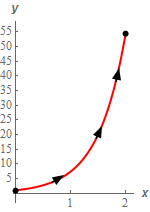

Parameterization of the curve:
$\vec r\left( t \right) = \left\langle {t,{{\bf{e}}^{2t}}} \right\rangle \hspace{0.25in}0 \le t \le 2$

In [10]:
# Place the vector field <F1(x,y,z), F2(x,y,z), F3(x,y,z)> and the parameterized path <x(t), y(t), z(t)> to be integrated 
integrand1 = integrand.subs([(F1, 0),
                             (F2, sqrt(1 + y)),
                             (F3, 0),
                             (x, t),
                             (y, sp.exp(2*t)),
                             (z, 0)]).doit().simplify()

I = sp.integrate(integrand1, (t, 0, 2)) 
I = sp.N(I, 7)
I

274.4897

=========================================================================================================================

**Problem 2.** Evaluate $\displaystyle \int\limits_{C}{{2y\,dx + \left( {1 - x} \right)\,dy}}$  where $C$ is portion of $y = 1 - {x^3}$   from  $x = -1$   to  $x = 2$

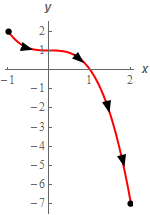

Parameterization of the curve: $\, \vec r\left( t \right) = \left\langle {t,1 - {t^3}} \right\rangle \hspace{0.25in} - 1 \le t \le 2$  

In [11]:
# GENERAL FRAMEWORK
t = sp.symbols('t', real=True)                                                # The parameter (variable)
x, y, z, F1, F2, F3 = sp.symbols('x y z F_1, F_2,  F_3', cls=sp.Function, real=True)
x = x(t)                                                                      # Parameterized x-coordinate for the curve
y = y(t)                                                                      # Parameterized y-coordinate for the curve
z = z(t)                                                                      # Parameterized z-coordinate for the curve
F1 = F1(x,y,z)                                                                # Vector field i-component                   
F2 = F2(x,y,z)                                                                # Vector field j-component 
F3 = F3(x,y,z)                                                                # Vector field k-component 
r = sp.Matrix([x, y, z])                                                      # Position vector for the path C
F = sp.Matrix([F1, F2, F3])                                                   # Vector field F1(x,y)i + F2(x,y)j + F3(x,y)
integrand = F.dot(sp.diff(r,t))                                               # According to the definition (last row)

In [12]:
# Place the vector field <F1(x,y,z), F2(x,y,z), F3(x,y,z)> and the parameterized path <x(t), y(t), z(t)> to be integrated 
integrand2 = integrand.subs([(F1, 2*y),
                             (F2, 1 - x),
                             (F3, 0),
                             (x, t),
                             (y, 1 - t**3),
                             (z, 0)]).doit().simplify()

sp.integrate(integrand2, (t, -1, 2)) 


3/4

=======================================================================================================================

**Problem 3.** Evaluate  $ \displaystyle \int\limits_{C}{{{x^2}\,dy - yz\,dz}} $ where $C$ is the the line segment from $(4, -1, 2)$ to $(1,7, -1).$


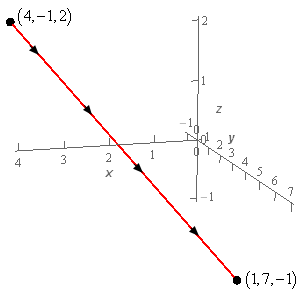

In [13]:
# With 'sympy.geometry Segment' (no need for 'GENERAL FRAMEWORK') as a Line integral of a vector field
F = C.x**2*C.j - C.y*C.z*C.k                                                        # Vector field in CoordSys3D('C')
s3 = Segment((4,-1,2), (1,7,-1))                                                    # 3D line segment
vector_integrate(F, s3)        #.doit().simplify()                                  # Line integral of a vector field

109/2

=======================================================================================================================

**Problem 4.** Evaluate  $\displaystyle \int\limits_{C}{{1 + {x^3}\,dx}}$ where $C$ is the right half of the circle of radius 2 with counter clockwise rotation followed by the line segment from $(0, 2)$ to $(-3, -4)$.

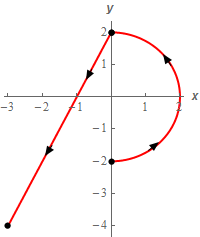


Parameterization of the curve:

${C_1}:\,\,\vec r\left( t \right) = \left\langle {2\cos \left( t \right),2\sin \left( t \right)} \right\rangle \hspace{0.25in} - \frac{1}{2}\pi  \le t \le \frac{1}{2}\pi$

$ {C_2}:\,\,$ We use 'sympy.geometry Segment' and we do not need parameterization there.

In [14]:
# GENERAL FRAMEWORK (using the last row of the definition of the line integral)
t = sp.symbols('t', real=True)                                                # The parameter (variable)
x, y, z, F1, F2, F3 = sp.symbols('x y z F_1, F_2,  F_3', cls=sp.Function, real=True)
x = x(t)                                                                      # Parameterized x-coordinate for the curve
y = y(t)                                                                      # Parameterized y-coordinate for the curve
z = z(t)                                                                      # Parameterized z-coordinate for the curve
F1 = F1(x,y,z)                                                                # Vector field i-component                   
F2 = F2(x,y,z)                                                                # Vector field j-component 
F3 = F3(x,y,z)                                                                # Vector field k-component 
r = sp.Matrix([x, y, z])                                                      # Position vector for the path C
F = sp.Matrix([F1, F2, F3])                                                   # Vector field F1(x,y)i + F2(x,y)j + F3(x,y)
integrand = F.dot(sp.diff(r,t))                                               # According to the definition (last row)

In [15]:
# Place the vector field <F1(x,y,z), F2(x,y,z), F3(x,y,z)> and the parameterized path <x(t), y(t), z(t)> to be integrated 
integrand4 = integrand.subs([(F1, 1 + (2*cos(t))**3 ),
                             (F2, 0),
                             (F3, 0),
                             (x, 2*cos(t)),
                             (y, 2*sin(t)),
                             (z, 0)]).doit().simplify()

integrand4

-2*(8*cos(t)**3 + 1)*sin(t)

The same integrand can be obtained using the definition $\,\,\int_C f(x,y)\, dx = \int_a^b f(x(t), y(t)) \,x'(t) \,dt :$ 

In [16]:
x = 2*cos(t)
Intgr4 = (1 + x**3)*sp.diff(x, t) 
Intgr4

-2*(8*cos(t)**3 + 1)*sin(t)

In [17]:
I1 = sp.integrate(integrand4, (t, -pi/2, pi/2)) 
I1

0

In [18]:
# With 'sympy.geometry Segment' (no need for 'GENERAL FRAMEWORK') as a Line integral of a vector field
F = (1 + C.x**3)*C.i                                                                 # Vector field in CoordSys3D('C')
s4 = Segment((0, 2), (-3, -4))                                                       # 2D line segment
I2 = vector_integrate(F, s4)        #.doit().simplify()                              # Line integral of a vector field
I2

69/4

In [19]:
I = I1 + I2
I

69/4

=========================================================================================================================

**Problem 5.** Evaluate $ \displaystyle \int\limits_{C}{{2{x^2}\,dy - xy\,dx}} \,\,$ where $C$ is the line segment from $(  1, -5)$ to $(-2, -3)$  followed by the portion of $y = 1 -x^2$  from $ x = -2$  to  $ x = 2$
 which in turn is followed by the line segment from $(2, -3)$ to $(4, -3)$.

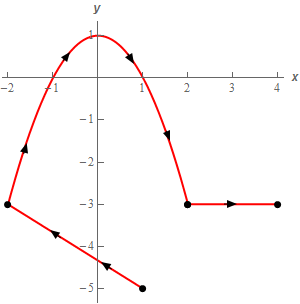

Parameterization of the curve:

${C_1}:\,\,$   'Sympy.geometry Segment' here, no need for parameterization.

${C_2}:\,\,\vec r\left( t \right) = \left\langle {t,1 - {t^2}} \right\rangle \hspace{0.25in} - 2 \le t \le 2$

$ {C_2}:\,\,$  'Sympy.geometry Segment' here, no need for parameterization.



In [20]:
# C1: With 'sympy.geometry Segment' 
F = -C.x*C.y*C.i + 2*C.x**2*C.j                                                         # Vector field in CoordSys3D('C')
s1 = Segment((1, -5), (-2, -3))                                                         # 2D line segment
I1 = vector_integrate(F, s1)        #.doit().simplify()                                 # Line integral of a vector field
I1


17/2

In [21]:
#C2: GENERAL FRAMEWORK (using the last row of the definition of the line integral)
t = sp.symbols('t', real=True)                                                # The parameter (variable)
x, y, z, F1, F2, F3 = sp.symbols('x y z F_1, F_2,  F_3', cls=sp.Function, real=True)
x = x(t)                                                                      # Parameterized x-coordinate for the curve
y = y(t)                                                                      # Parameterized y-coordinate for the curve
z = z(t)                                                                      # Parameterized z-coordinate for the curve
F1 = F1(x,y,z)                                                                # Vector field i-component                   
F2 = F2(x,y,z)                                                                # Vector field j-component 
F3 = F3(x,y,z)                                                                # Vector field k-component 
r = sp.Matrix([x, y, z])                                                      # Position vector for the path C
F = sp.Matrix([F1, F2, F3])                                                   # Vector field F1(x,y)i + F2(x,y)j + F3(x,y)
integrand = F.dot(sp.diff(r,t))                                               # According to the definition (last row)

In [22]:
#C2:Place the vector field <F1(x,y,z), F2(x,y,z), F3(x,y,z)> and the parameterized path <x(t), y(t), z(t)> to be integrated 
integrand5 = integrand.subs([(F1, -x*y ),
                             (F2, 2*x**2),
                             (F3, 0),
                             (x, t),
                             (y, 1 - t**2),
                             (z, 0)]).doit().simplify()

integrand5

-3*t**3 - t

In [23]:
I2 = sp.integrate(integrand5, (t, -2, 2)) 
I2

0

In [24]:
# C3: With 'sympy.geometry Segment' 
F = -C.x*C.y*C.i + 2*C.x**2*C.j                                                         # Vector field in CoordSys3D('C')
s3 = Segment((2, -3), (4, -3))                                                          # 2D line segment
I3 = vector_integrate(F, s3)        #.doit().simplify()                                 # Line integral of a vector field
I3

18

In [25]:
I = I1+I2+I3
I

53/2

=========================================================================================================================

**Problem 6.** Evaluate $ \displaystyle \int\limits_{C}{{\left( {x - y} \right)\,dx - y{x^2}\,dy}}$ for each of the following two curves.

**(a)**

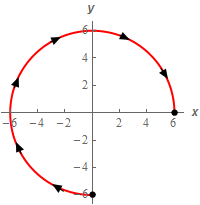

Parameterization  for the curve:

C:$\,\,\,\,\vec r\left( t \right) = \left\langle {6\cos \left( t \right), - 6\sin \left( t \right)} \right\rangle \hspace{0.25in} \frac{1}{2}\pi  \le t \le 2\pi$

In [26]:
#(a) GENERAL FRAMEWORK (using the last row of the definition of the line integral)
t = sp.symbols('t', real=True)                                                # The parameter (variable)
x, y, z, F1, F2, F3 = sp.symbols('x y z F_1, F_2,  F_3', cls=sp.Function, real=True)
x = x(t)                                                                      # Parameterized x-coordinate for the curve
y = y(t)                                                                      # Parameterized y-coordinate for the curve
z = z(t)                                                                      # Parameterized z-coordinate for the curve
F1 = F1(x,y,z)                                                                # Vector field i-component                   
F2 = F2(x,y,z)                                                                # Vector field j-component 
F3 = F3(x,y,z)                                                                # Vector field k-component 
r = sp.Matrix([x, y, z])                                                      # Position vector for the path C
F = sp.Matrix([F1, F2, F3])                                                   # Vector field F1(x,y)i + F2(x,y)j + F3(x,y)
integrand = F.dot(sp.diff(r,t))                                               # According to the definition (last row)

In [27]:
#(a) Place the vector field <F1(x,y,z), F2(x,y,z), F3(x,y,z)> and the parameterized path <x(t), y(t), z(t)> to be integrated 
integrand6 = integrand.subs([(F1, x - y ),
                             (F2, -y*x**2),
                             (F3, 0),
                             (x, 6*cos(t)),
                             (y, -6*sin(t)),
                             (z, 0)]).doit().simplify()

Ia = sp.integrate(integrand6, (t, pi/2, 2*pi)) 
print(sp.N(Ia, 7))
Ia

257.1770


342 - 27*pi

**(b)**

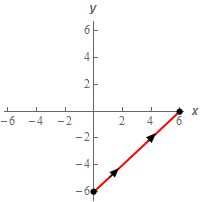

In [28]:
# (b): With 'sympy.geometry Segment' (no need for 'GENERAL FRAMEWORK') as a Line integral of a vector field
F = (C.x - C.y)*C.i - C.y*C.x**2*C.j                                                  # Vector field in CoordSys3D('C')
sb = Segment((0, -6), (6, 0))                                                         # 2D line segment
Ib = vector_integrate(F, sb)        #.doit().simplify()                               # Line integral of the vector field F
Ib

144

=========================================================================================================================

**Problem 7.** Evaluate $  \displaystyle \int\limits_{C}{{{x^3}\,dy - \left( {y + 1} \right)\,dx}}$ for each of the following two curves.

**(a)** $\,\,\, C$ is the line segment from $(1, 7)$ to $(-2, 4).$

In [29]:
# (a): With 'sympy.geometry Segment' (no need for 'GENERAL FRAMEWORK') as a Line integral of a vector field
F = -(C.y + 1)*C.i + C.x**3*C.j                                                       # Vector field in CoordSys3D('C')
sa = Segment((1, 7), (-2, 4))                                                         # 2D line segment
Ia = vector_integrate(F, sa)        #.doit().simplify()                               # Line integral of the vector field F
Ia

93/4

**(b)** $\,\,\, C$ is the line segment from $(1, 7)$ to $(-2, 4)\,$ (with opposite direction to part (a)).

In [30]:
# (b): With 'sympy.geometry Segment' (no need for 'GENERAL FRAMEWORK') as a Line integral of a vector field
F = -(C.y + 1)*C.i + C.x**3*C.j                                                       # Vector field in CoordSys3D('C')
sb = Segment((-2, 4), (1, 7))                                                         # 2D line segment
Ib = vector_integrate(F, sb)        #.doit().simplify()                               # Line integral of the vector field F
Ib

-93/4

=================================

Codes: Heikki Miettinen 2024
